In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [9]:
data_dir = pathlib.Path(data_dir)
data_dir
  

PosixPath('datasets/flower_photos')

In [13]:
#Gives the list of all the images that are in the folder.
image_count = len(list(data_dir.glob('*/*.jpg')))

In [14]:
#Gives the list of all the rose images.
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

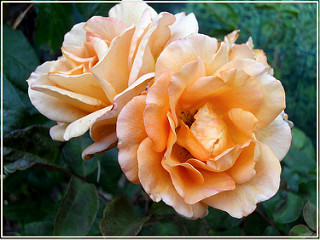

In [17]:
PIL.Image.open(str(roses[2])) 

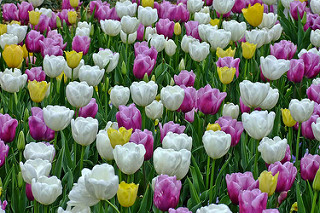

In [27]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[8])) 

In [44]:
# This dict has file path of all different flowers.
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
 #Labling all the dict 
flowers_labels_dict = {
    'roses' : 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [46]:
#with the help of cv2 it gives us the 3D numpy array of the image
img = cv2.imread(flowers_images_dict['roses'][2])
img.shape

(240, 320, 3)

In [47]:
#Images that are in the folders are of different sizes, cv2 will convert and resize them into a standard size.
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [57]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [59]:
#COnverted list into numpy array
X = np.array(X)
y = np.array(y)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [60]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [62]:
num_classes = 5 
model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.3275 - loss: 1.6560
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.6069 - loss: 1.0366
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.6839 - loss: 0.8501
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.7752 - loss: 0.6282
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.8733 - loss: 0.3776
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9275 - loss: 0.2267
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9608 - loss: 0.1270
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9749 - loss: 0.0862
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9782 - loss: 0.0678
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9885 - loss: 0.0515


In [63]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6331 - loss: 2.0856


[2.1440882682800293, 0.6285402774810791]

We can see that your model is having accuracy: 0.9885 - loss: 0.0515, but when evaluating it we get low accuracy: 0.6331 - loss: 2.0856.
this is a clear case of overfitting.
To deal with this problem we will be using Data augmentaion.

In [66]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/Users/MARMIK/anaconda3/envs/venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
num_classes = 5 
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.3963 - loss: 1.3975
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.5871 - loss: 1.0608
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.6355 - loss: 0.9463
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6694 - loss: 0.8506
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.6974 - loss: 0.7833
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.7331 - loss: 0.7197
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.7462 - loss: 0.6662
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.7440 - loss: 0.6954
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.7460 - loss: 0.6471
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.7597 - loss: 0.6307
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.7809 - loss: 0.5953
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7574 - loss: 1.0972


[1.2118942737579346, 0.7472766637802124]